In [39]:
import matplotlib.pyplot as plt
import einops
from pathlib import Path
import torch
import torch as t
from torchvision.transforms import ToPILImage
from collections import defaultdict

In [23]:
stats = {8: defaultdict(int), 32: defaultdict(int), 64: defaultdict(int)}

for layers in stats.keys():
    for i, checkpoint in enumerate([c for c in sorted(Path("~/src/ai/gan/export/export/steps/").expanduser().glob(f"discrim [{layers},*.pt"),
                                                      key=lambda x: int(str(x).split("]")[-1].split("_")[0]))]):
        model = torch.load(checkpoint, map_location=torch.device('cpu'))

        generator = model['generator_state_dict']

        stats[layers]['generator_max'] = max(out_kernel_weight.max(), stats[layers]['generator_max'])
        stats[layers]['generator_min'] = min(out_kernel_weight.min(), stats[layers]['generator_min'])

        discrim = model['discriminator_state_dict']
        in_kernel_weight = discrim['weight']
        
        stats[layers]['discrim_max'] = max(in_kernel_weight.max(), stats[layers]['discrim_max'])
        stats[layers]['discrim_min'] = min(in_kernel_weight.min(), stats[layers]['discrim_min'])
        bash: alias: =: not found
bash: alias: =: not found


print(stats)

# get max and min value for entire dataset

# 

# save to all the different folders

{8: defaultdict(<class 'int'>, {'generator_max': tensor(0.1479), 'generator_min': tensor(-0.1466), 'discrim_max': tensor(0.2610), 'discrim_min': tensor(-0.2752)}), 32: defaultdict(<class 'int'>, {'generator_max': tensor(0.1479), 'generator_min': tensor(-0.1466), 'discrim_max': tensor(0.2887), 'discrim_min': tensor(-0.3482)}), 64: defaultdict(<class 'int'>, {'generator_max': tensor(0.1479), 'generator_min': tensor(-0.1466), 'discrim_max': tensor(0.3088), 'discrim_min': tensor(-0.3022)})}


dict_keys(['epoch', 'generator_state_dict', 'discriminator_state_dict', 'images'])
dict_keys(['epoch', 'generator_state_dict', 'discriminator_state_dict', 'images'])
dict_keys(['epoch', 'generator_state_dict', 'discriminator_state_dict', 'images'])


KeyboardInterrupt: 

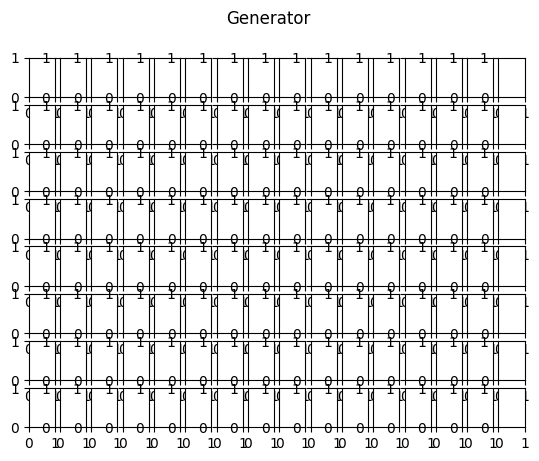

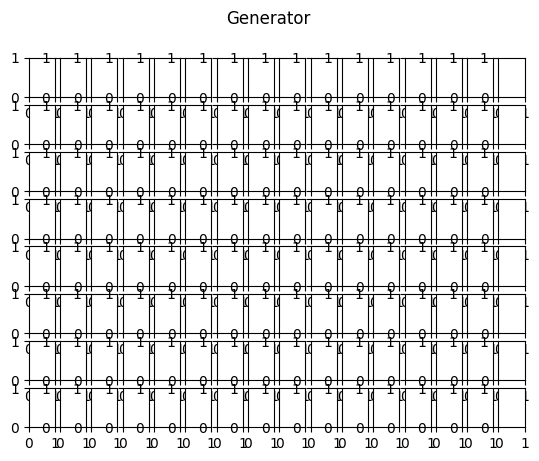

Error in callback <function flush_figures at 0x77c44e914550> (for post_execute), with arguments args (),kwargs {}:


KeyboardInterrupt: 

In [25]:
for layers in stats.keys():
    files = [c for c in sorted(Path("~/src/ai/gan/export/export/steps/").expanduser().glob(f"discrim [{layers},*.pt"),
                                                      key=lambda x: int(str(x).split("]")[-1].split("_")[0]))]
    for i, checkpoint in enumerate(files):
        model = torch.load(checkpoint, map_location=torch.device('cpu'))
        
        fig, axes = plt.subplots(128//16, 16)
        fig.suptitle(f"Generator")
        generator = model['generator_state_dict']
        discrim = model['discriminator_state_dict']
        images = model['images']

        print(model.keys())
        

In [37]:
im = einops.rearrange(images, " (b1 b2) c h w -> (b1 h) (b2 w) c", b1 = 2) / 2 + 0.5

plt.imshow(im)
plt.gca().get_xaxis().set_ticks([])
plt.gca().get_yaxis().set_ticks([])
plt.show()

EinopsError:  Error while processing rearrange-reduction pattern " (b1 b2) c h w -> (b1*1.1 h) (b2 w) c".
 Input tensor shape: torch.Size([8, 3, 64, 64]). Additional info: {'b1': 2}.
 Expression may contain dots only inside ellipsis (...)

In [2]:
for i, checkpoint in enumerate([c for c in sorted(Path("./GAN").glob("*.pt"), 
                         key=lambda x: int(str(x).replace("GAN/", "").replace("_model.pt", "")))]):
#     plt.figure(str(checkpoint))
    fig, axes = plt.subplots(128//16, 16)
    fig.suptitle(f"Generator")

    model = torch.load(checkpoint)

    generator = model['generator_state_dict']
    discrim = model['discriminator_state_dict']

    out_kernel_weight = generator['weight']
    out_kernel_bias = generator['bias']
    
    in_kernel_weight = discrim["weight"]

#     plotted = in_kernel_weight
    plotted = t.nn.functional.tanh(out_kernel_weight)
#     plotted = out_kernel_weight

    if t.isnan(plotted).any():
        break
100278032

    for ax, kernel in zip(axes.flatten(), [k for k in plotted]):
        kernel = einops.rearrange(kernel, "c h w -> h w c")
    
        # normalize
        kernel = (kernel - t.min(plotted)) / (t.max(plotted) - t.min(plotted))
        ax.imshow(kernel.cpu().numpy())
        ax.get_xaxis().set_ticks([])
        ax.get_yaxis().set_ticks([])
        fig.subplots_adjust( left=None, bottom=None,  right=None, top=None, wspace=0, hspace=-0.8)
        
    # plt.savefig(f"./images/generator/{i + 100_000_000}.png")
    plt.show()
    plt.close()
    
    fig, axes = plt.subplots(128//16, 16)
    fig.suptitle(f"Discriminator")

    model = torch.load(checkpoint)

    generator = model['generator_state_dict']
    discrim = model['discriminator_state_dict']

    out_kernel_weight = generator['weight']
    out_kernel_bias = generator['bias']
    
    in_kernel_weight = discrim["weight"]

    if t.isnan(plotted).any():
        break

    plotted = in_kernel_weight

    for ax, kernel in zip(axes.flatten(), [k for k in in_kernel_weight]):
        kernel = einops.rearrange(kernel, "c h w -> h w c")
    
        # normalize
        kernel = (kernel - t.min(plotted)) / (t.max(plotted) - t.min(plotted))
        ax.imshow(kernel.cpu().numpy())
        ax.get_xaxis().set_ticks([])
        ax.get_yaxis().set_ticks([])
        fig.subplots_adjust( left=None, bottom=None,  right=None, top=None, wspace=0, hspace=-0.8)
        
    # plt.savefig(f"./images/discriminator/{i + 100_000_000}.png")
    plt.show()
    plt.close()

NameError: name 'Path' is not defined